# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Datensatz

In [58]:
#Laufzeit in Jahren
T = 1
# Implizite Volatilität
sigma = 0.067746
#Anfänglicher Wechselkurs (Spot)
S0 = 1.11674
#Inländischer Zins (EUR)
r_d = 0.0152826
#Ausländischer Zins (USD)
r_f = 0.0284509
#Strike
K = 1.13226


# Garman Kohlhagen Model

In [3]:
# Implementierung der Garman-Kohlhagen Model
def garman_kohlhagen(S0, K, T, r_d, r_f, sigma, option_type="call"):
    d1 = (np.log(S0 / K) + (r_d - r_f + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == "call":
        return S0 * np.exp(-r_f * T) * norm.cdf(d1) - K * np.exp(-r_d * T) * norm.cdf(d2)
    elif option_type == "put":
        return K * np.exp(-r_d * T) * norm.cdf(-d2) - S0 * np.exp(-r_f * T) * norm.cdf(-d1)

call_price_gk = garman_kohlhagen(S0, K, T, r_d, r_f, sigma, "call")
put_price_gk = garman_kohlhagen(S0, K, T, r_d, r_f, sigma, "put")

In [4]:
# Anzeigen der Optionspreise
print(f"Preis Europäische Call Option (Garman-Kohlhagen): {call_price_gk:.4f}")
print(f"Preis Europäische Put Option (Garman-Kohlhagen): {put_price_gk:.4f}")


Preis Europäische Call Option (Garman-Kohlhagen): 0.0172
Preis Europäische Put Option (Garman-Kohlhagen): 0.0469


# Greeks

In [5]:
#Berechnung der Greeks
def calculate_greeks(S0, K, T, r_d, r_f, sigma, option_type="call"):
    d1 = (np.log(S0/K) + (r_d - r_f + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    delta = np.exp(-r_f * T) * norm.cdf(d1) if option_type == "call" else -np.exp(-r_f * T) * norm.cdf(-d1)
    gamma = np.exp(-r_f * T) * norm.pdf(d1) / (S0 * sigma * np.sqrt(T))
    
    theta = -np.exp(-r_f*T)*((norm.pdf(d1)*S0*sigma) / (2 * np.sqrt(T)))
    if option_type == "call":
        theta += r_f * S0 * np.exp(-r_f * T) * norm.cdf(d1) - r_d * K * np.exp(-r_d*T) * norm.cdf(d2)
    else:
        theta -= r_f * S0 * np.exp(-r_f * T) * norm.cdf(-d1) + r_d * K * np.exp(-r_d * T) * norm.cdf(-d2)

    
    vega = S0 * np.exp(-r_f * T) * np.sqrt(T) * norm.pdf(d1) 
    
    vanna = -np.exp(-r_f * T)*norm.pdf(d1)*(d2 / sigma)
    volga = vega * (d1 * d2 / sigma)
    
    return {
        "Delta": delta,
        "Gamma": gamma,
        "Theta": theta,
        "Vega": vega,
        "Vanna": vanna,
        "Volga": volga
    }

In [6]:
calculate_greeks(S0, K, T, r_d, r_f, sigma, option_type="call")

{'Delta': 0.3478039095100761,
 'Gamma': 4.796340442031787,
 'Theta': -0.008348435494176625,
 'Vega': 0.4052264675493179,
 'Vanna': 2.313803556249391,
 'Volga': 0.9411523984671822}

In [7]:
calculate_greeks(S0, K, T, r_d, r_f, sigma, option_type="put")

{'Delta': -0.6241461062102581,
 'Gamma': 4.796340442031787,
 'Theta': -0.04492549128825741,
 'Vega': 0.4052264675493179,
 'Vanna': 2.313803556249391,
 'Volga': 0.9411523984671822}

# Sensitivitätsanalyse

In [8]:
# Wertebereiche für die Analyse
T_range = np.linspace(0.2, 1, 20)
sigma_range = np.linspace(0.02, 0.30, 20)
S0_range = np.linspace(0.95, 1.25, 20)
r_d_range = np.linspace(-0.1, 0.1, 20)
r_f_range = np.linspace(-0.1, 0.1, 20)
K_range = np.linspace(0.9, 1.3, 20)

In [9]:
# Speicherung der Werte
greek_sensitivities_T = {key: [] for key in ["Delta", "Gamma", "Vega", "Theta", "Vanna", "Volga"]}
greek_sensitivities_sigma = {key: [] for key in ["Delta", "Gamma", "Vega", "Theta", "Vanna", "Volga"]}
greek_sensitivities_S0 = {key: [] for key in ["Delta", "Gamma", "Vega", "Theta", "Vanna", "Volga"]}
greek_sensitivities_r_d = {key: [] for key in ["Delta", "Gamma", "Vega", "Theta", "Vanna", "Volga"]}
greek_sensitivities_r_f = {key: [] for key in ["Delta", "Gamma", "Vega", "Theta", "Vanna", "Volga"]}
greek_sensitivities_K = {key: [] for key in ["Delta", "Gamma", "Vega", "Theta", "Vanna", "Volga"]}

## Laufzeiten

In [57]:
#Laufzeit in Jahren
T = 1
# Implizite Volatilität
sigma = 0.067746
#Anfänglicher Wechselkurs (Spot)
S0 = 1.11674
#Inländischer Zins (EUR)
r_d = 0.0152826
#Ausländischer Zins (USD)
r_f = 0.0284509
#Strike
K = 1.13226


In [11]:
# Sensitivitätsberechnung für verschiedene Laufzeiten (T)
for T in T_range:
    values_T = calculate_greeks(S0, K, T, r_d, r_f, sigma, option_type="call")
    for key in greek_sensitivities_T.keys():
        greek_sensitivities_T[key].append(values_T[key])

In [12]:
greek_sensitivities_T["Theta"]

[-0.02472982045245283,
 -0.022320623694559845,
 -0.020377353438452015,
 -0.018770112425451287,
 -0.017413614782552087,
 -0.016249689207271014,
 -0.015237275994339945,
 -0.014346521517920707,
 -0.013555159630763019,
 -0.012846214425263104,
 -0.0122064943824687,
 -0.011625576736455916,
 -0.011095104930687664,
 -0.010608291614071664,
 -0.010159559936479257,
 -0.009744279981038495,
 -0.009358571956797462,
 -0.008999157088732522,
 -0.00866324314515504,
 -0.008348435494176625]

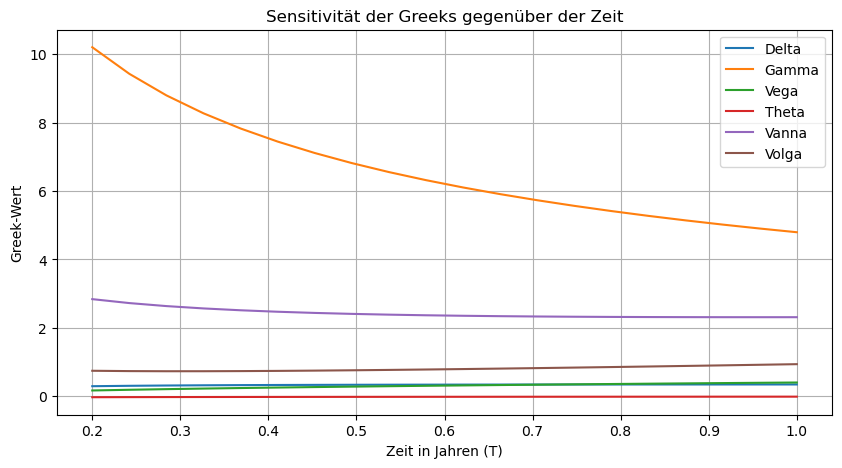

In [13]:
# Plot Sensitivität gegenüber Zeit (T)
plt.figure(figsize=(10, 5))
for greek, values in greek_sensitivities_T.items():
    plt.plot(T_range, values, label=greek)
plt.xlabel("Zeit in Jahren (T)")
plt.ylabel("Greek-Wert")
plt.title("Sensitivität der Greeks gegenüber der Zeit")
plt.legend()
plt.grid()
plt.show()

## Volatilität

In [56]:
#Laufzeit in Jahren
T = 1
# Implizite Volatilität
sigma = 0.067746
#Anfänglicher Wechselkurs (Spot)
S0 = 1.11674
#Inländischer Zins (EUR)
r_d = 0.0152826
#Ausländischer Zins (USD)
r_f = 0.0284509
#Strike
K = 1.13226

In [15]:
# Sensitivitätsberechnung für verschiedene Volatilitäten
for sigma in sigma_range:
    values = calculate_greeks(S0, K, T, r_d, r_f, sigma, option_type="call")
    for key in greek_sensitivities_sigma.keys():
        greek_sensitivities_sigma[key].append(values[key])


In [53]:
greek_sensitivities_sigma["Vega"]

[0.17679210212219734,
 0.3246357037548489,
 0.3781793444185314,
 0.40163254733893317,
 0.4136964844047277,
 0.4206196219815096,
 0.4249008817447829,
 0.4276865766951131,
 0.42955980128026316,
 0.430841787475109,
 0.4317210487771396,
 0.432314027625171,
 0.43269575992259235,
 0.43291635126553474,
 0.433010291483323,
 0.43300195262503327,
 0.43290895674746604,
 0.4327443063350592,
 0.43251777053897544,
 0.43223680995603003]

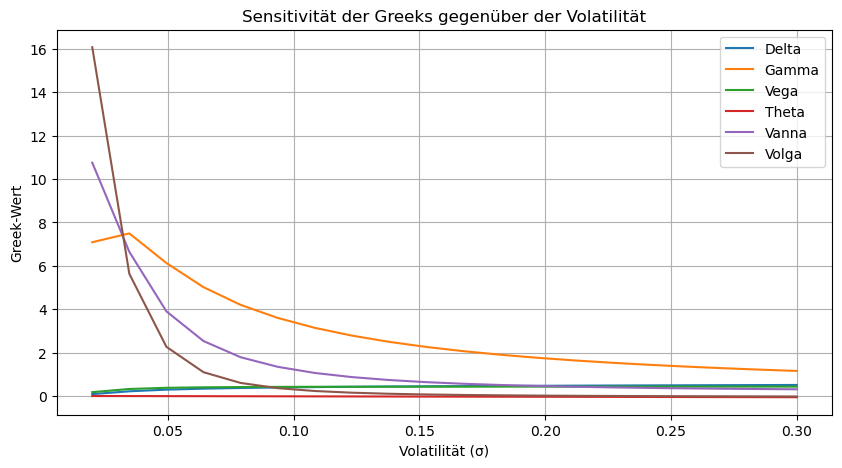

In [17]:
# Plot Sensitivität gegenüber Volatilität (sigma)
plt.figure(figsize=(10, 5))
for greek, values in greek_sensitivities_sigma.items():
    plt.plot(sigma_range, values, label=greek)
plt.xlabel("Volatilität (σ)")
plt.ylabel("Greek-Wert")
plt.title("Sensitivität der Greeks gegenüber der Volatilität")
plt.legend()
plt.grid()
plt.show()


## Spot

In [55]:
#Laufzeit in Jahren
T = 1
# Implizite Volatilität
sigma = 0.067746
#Anfänglicher Wechselkurs (Spot)
S0 = 1.11674
#Inländischer Zins (EUR)
r_d = 0.0152826
#Ausländischer Zins (USD)
r_f = 0.0284509
#Strike
K = 1.13226

In [19]:
# Sensitivitätsberechnung für verschiedene Spotpreise (S0)
for S0 in S0_range:
    values_S0 = calculate_greeks(S0, K, T, r_d, r_f, sigma, option_type="call")
    for key in greek_sensitivities_S0.keys():
        greek_sensitivities_S0[key].append(values_S0[key])


In [54]:
greek_sensitivities_S0["Delta"]

[0.0028856345714003617,
 0.0059026145117171,
 0.011322519240877496,
 0.020438935978820433,
 0.034838405242636414,
 0.05625570770690552,
 0.08633167559560623,
 0.12630685205433206,
 0.17671483176374117,
 0.23715352049657312,
 0.3062023426419516,
 0.38151964988638887,
 0.46010803522502913,
 0.5386919323321053,
 0.6141261115286704,
 0.6837524506084263,
 0.7456433585729444,
 0.7987040515308053,
 0.8426406308322306,
 0.8778268562862087]

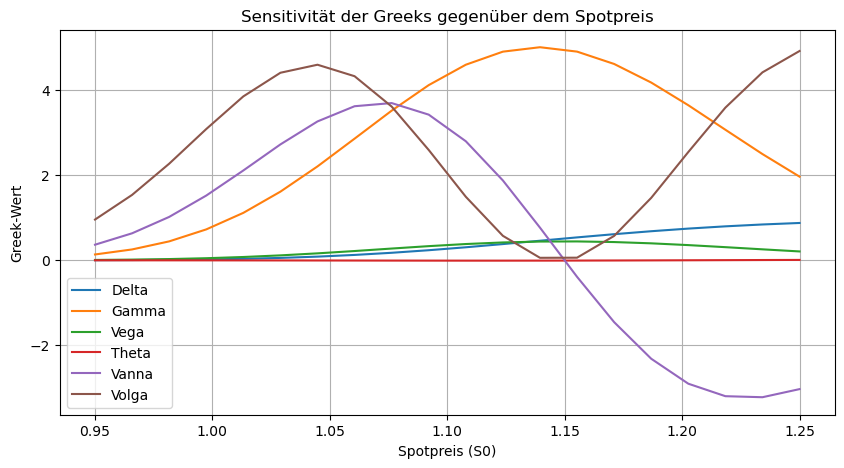

In [21]:
# Plot Sensitivität gegenüber Spotpreis (S0)
plt.figure(figsize=(10, 5))
for greek, values in greek_sensitivities_S0.items():
    plt.plot(S0_range, values, label=greek)
plt.xlabel("Spotpreis (S0)")
plt.ylabel("Greek-Wert")
plt.title("Sensitivität der Greeks gegenüber dem Spotpreis")
plt.legend()
plt.grid()
plt.show()

# GBM

In [26]:
#Parameter
#Anzahl der Schritte
n = 100
#Anzahl der Simulationen
M = 1000
#Laufzeit in Jahren
T = 1
#Implizite Volatilität
sigma = 0.067746
#Anfänglicher Wechselkurs (Spot)
S0 = 1.11674
#Inländischer Zins (EUR)
r_d = 0.0152826
#Ausländischer Zins (USD)
r_f = 0.0284509
#Strike
K = 1.13226



In [27]:
#Simulating GBM Paths
def simulate_fx_rates(S0, r_d, r_f, sigma, T, n, M):

    #Berechnung der Zeitschritte
    dt = T/n

    #Simulation
    St = np.exp(
        (r_d - r_f - sigma**2/2)*dt
        + sigma*np.random.normal(0, np.sqrt(dt), size=(M,n)).T
    )

    #Hinzufügen von einem Array bestehend aus 1
    St = np.vstack([np.ones(M), St])

    #Multiplikation des neu erstellten Arrays mit dem Ausgangswert S0
    St = S0*St.cumprod(axis=0)

    #Definition der Zeitintervalle
    time = np.linspace(0, T, n+1)

    #Numpy Array an St anpassen
    tt = np.full(shape=(M,n+1), fill_value=time).T

    return time, St

In [28]:
# Beispielhafte Nutzung
time, St = simulate_fx_rates(S0, r_d, r_f, sigma, T, n, M)

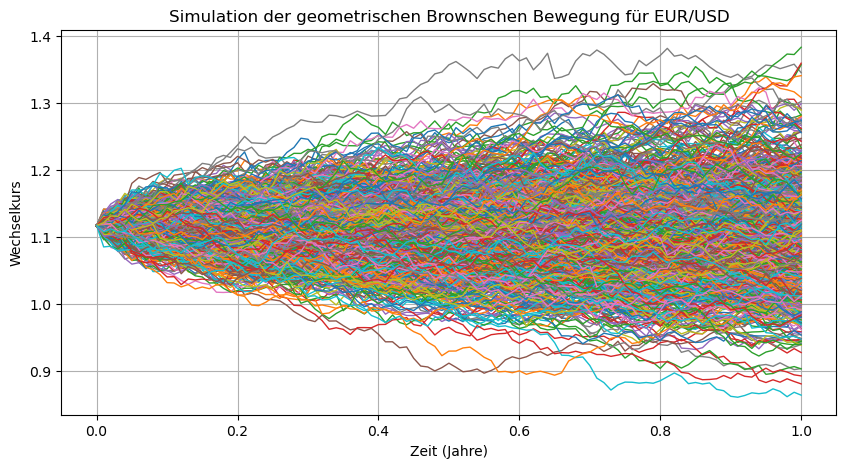

In [29]:
# Visualisierung der simulierten Pfade
plt.figure(figsize=(10,5))
plt.plot(time, St[:, :], lw=1)
plt.xlabel("Zeit (Jahre)")
plt.ylabel("Wechselkurs")
plt.title("Simulation der geometrischen Brownschen Bewegung für EUR/USD")
plt.grid()
plt.show()

In [30]:
# Kalkulation der Europäischen Call und Put Preises
S_T = St[-1]  # FX rate am Ende der Laufzeit
call_payoff = np.maximum(S_T - K, 0)
put_payoff = np.maximum(K - S_T, 0)

call_price_mc = np.mean(call_payoff)
put_price_mc = np.mean(put_payoff)


In [31]:
print(f"European Call Option Price (Monte Carlo): {call_price_mc:.4f}")
print(f"European Put Option Price (Monte Carlo): {put_price_mc:.4f}")

European Call Option Price (Monte Carlo): 0.0165
European Put Option Price (Monte Carlo): 0.0489


# Risk Reversal und Delta Hedge - Szenarioanalyse

## Szenarioanalyse EUR/USD und DH und RR Berechnung

In [32]:
#Laufzeit in Jahren
T = 1
#Implizite Volatilität
sigma = 0.067746
#Anfänglicher Wechselkurs (Spot)
S0 = 1.11674
#Inländischer Zins (EUR)
r_d = 0.0152826
#Ausländischer Zins (USD)
r_f = 0.0284509
#Strike
K = 1.13226

In [33]:
#Parameter Allgemein
#Anzahl der Schritte
n = 100
#Anzahl der Simulationen
M = 1000
#Laufzeit in Jahren
T = 1


In [34]:
# Parameter stabiler Markt
#Anfänglicher Wechselkurs (Spot)
S0_stabil = 1.11674
S0_a = 1.11674
#Inländischer Zins (EUR)
r_d_stabil = 0.0152826
#Ausländischer Zins (USD)
r_f_stabil = 0.0284509
#Strike
K_stabil = 1.13226
Kp_stabil = 1.10122

In [35]:
# Parameter volatiler Markt
#Anfänglicher Wechselkurs (Spot)
S0_volatil = 0.9799
S0_b = 0.9799
#Inländischer Zins (EUR)
r_d_volatil = 0.02478
#Ausländischer Zins (USD)
r_f_volatil = 0.04579
#Strike
K_volatil = 1.00279
Kp_volatil = 0.95701

In [36]:
# Volatilitäten für stabilen vs. volatilen Markt
sigma_stabil = 0.067746
sigma_volatil = 0.11205

In [37]:
time, fx_rates_stabil_EURUSD = simulate_fx_rates(S0_stabil, r_d_stabil, r_f_stabil, sigma_stabil, T, n, M)
time, fx_rates_volatil_EURUSD = simulate_fx_rates(S0_volatil, r_d_volatil, r_f_volatil, sigma_volatil, T, n, M)


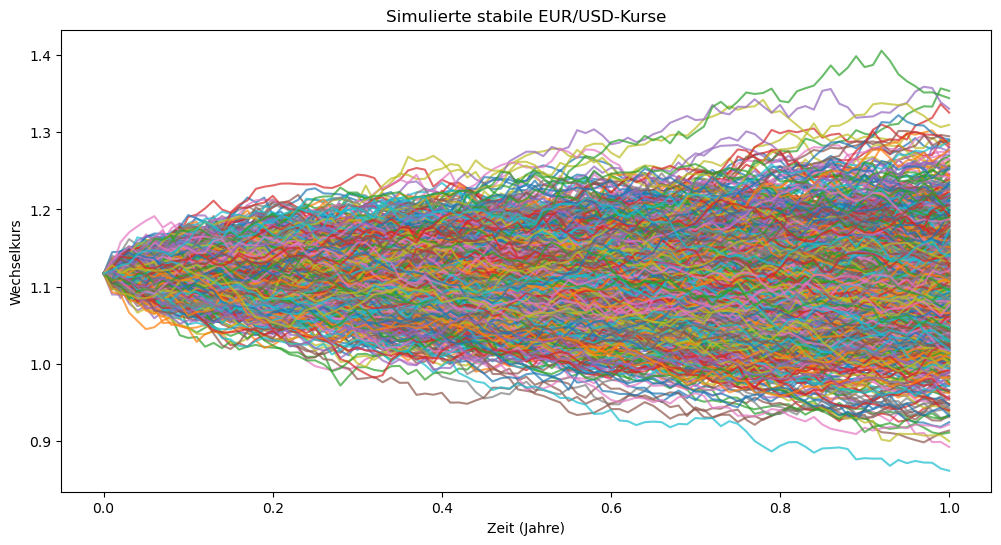

In [38]:
# EUR/USD Stabiler Markt Simulationen plotten
plt.figure(figsize=(12, 6))
plt.plot(time, fx_rates_stabil_EURUSD[:, :], label="Stabiler Markt", alpha=0.7)
plt.title("Simulierte stabile EUR/USD-Kurse")
plt.xlabel("Zeit (Jahre)")
plt.ylabel("Wechselkurs")
plt.show()

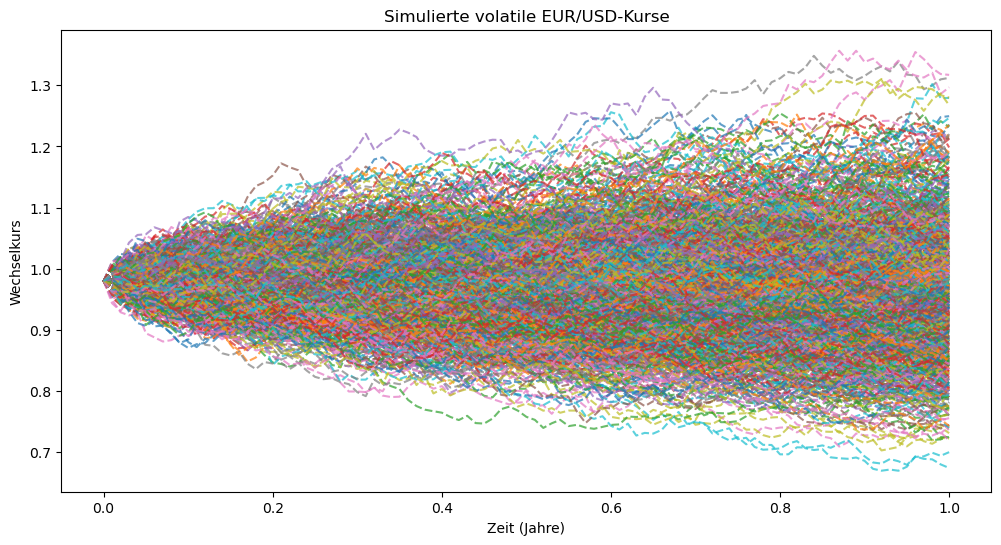

In [39]:
# EUR/USD volatiler Markt Simulationen plotten
plt.figure(figsize=(12, 6))
plt.plot(time, fx_rates_volatil_EURUSD[:, :], label="Volatiler Markt", alpha=0.7, linestyle="dashed")
plt.title("Simulierte volatile EUR/USD-Kurse")
plt.xlabel("Zeit (Jahre)")
plt.ylabel("Wechselkurs")
plt.show()

In [40]:
#Anfängliches Delta - Stabil
greeks = calculate_greeks(S0_stabil, K_stabil, T, r_d_stabil, r_f_stabil, sigma_stabil, "call")
greeks["Delta"]

0.3478039095100761

In [41]:
def Payoff_ohne_Hedge(S0, K, T, r_d, r_f, sigma):
    return S0 - K

In [42]:
def Payoff_RiskReversal(S0, K, Kp, T, r_d, r_f, sigma):
    Call_Payoff = np.maximum(S0 - K, 0)
    Put_Payoff = np.maximum(Kp - S0, 0)
    return Call_Payoff - Put_Payoff

In [43]:
def Payoff_DeltaHedge(S0, S0_a, K, T, r_d, r_f, sigma):
    Call_Payoff = np.maximum(S0 - K, 0)
    Hedge_Payoff = greeks["Delta"]*(S0 - S0_a)
    return Call_Payoff - Hedge_Payoff

## EURUSD Hedge

In [47]:
PnL_ohne_Hedge_stabil_EURUSD = np.array([Payoff_ohne_Hedge(S0_stabil, K_stabil, T, r_d_stabil, r_f_stabil, sigma_stabil) for S0_stabil in fx_rates_stabil_EURUSD[-1, :]])
PnL_RiskReversal_stabil_EURUSD = np.array([Payoff_RiskReversal(S0_stabil, K_stabil, Kp_stabil, T, r_d_stabil, r_f_stabil, sigma_stabil) for S0_stabil in fx_rates_stabil_EURUSD[-1, :]])
PnL_DeltaHedge_stabil_EURUSD = np.array([Payoff_DeltaHedge(S0_stabil, S0_a, K_stabil, T, r_d_stabil, r_f_stabil, sigma_stabil) for S0_stabil in fx_rates_stabil_EURUSD[-1, :]])
PnL_ohne_Hedge_volatil_EURUSD = np.array([Payoff_ohne_Hedge(S0_volatil, K_volatil, T, r_d_volatil, r_f_volatil, sigma_volatil) for S0_volatil in fx_rates_volatil_EURUSD[-1, :]])
PnL_RiskReversal_volatil_EURUSD = np.array([Payoff_RiskReversal(S0_volatil, K_volatil, Kp_volatil, T, r_d_volatil, r_f_volatil, sigma_volatil) for S0_volatil in fx_rates_volatil_EURUSD[-1, :]])
PnL_DeltaHedge_volatil_EURUSD = np.array([Payoff_DeltaHedge(S0_volatil, S0_b, K_volatil, T, r_d_volatil, r_f_volatil, sigma_volatil) for S0_volatil in fx_rates_volatil_EURUSD[-1, :]])

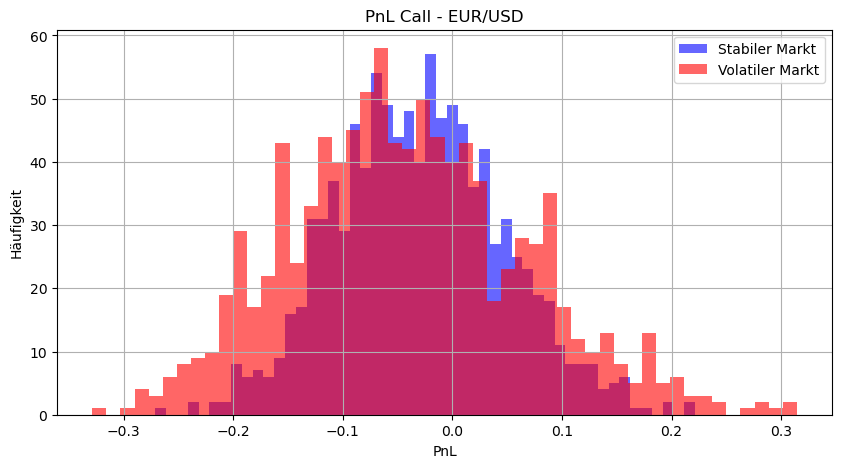

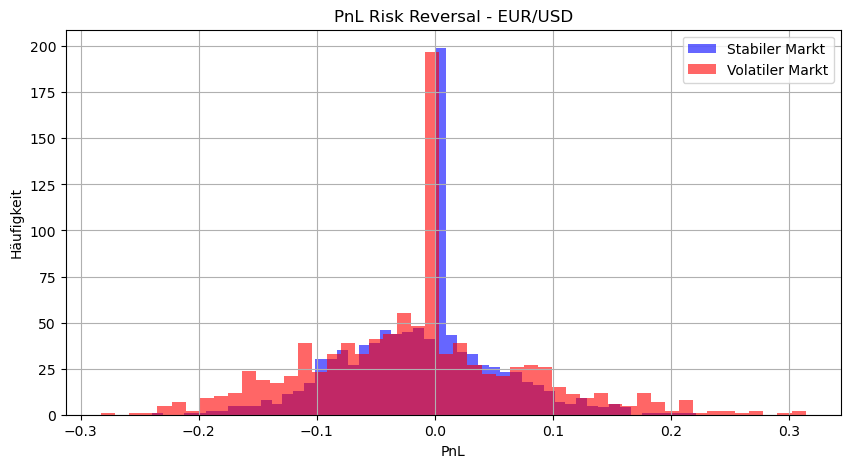

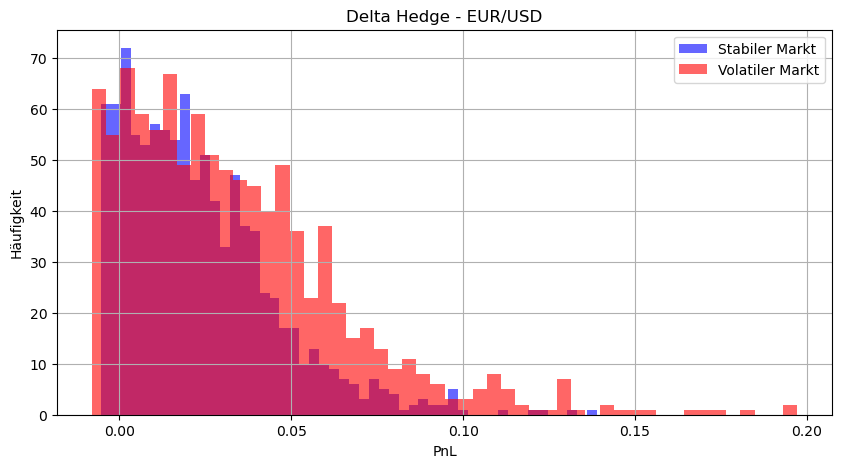

In [48]:
# Histogramm-Funktion
def plot_histogram(data_stabil,data_volatil, Titel, xTitel):
    plt.figure(figsize=(10, 5))
    plt.hist(data_stabil, bins=50, alpha=0.6, color='blue', label="Stabiler Markt")
    plt.hist(data_volatil, bins=50, alpha=0.6, color='red', label="Volatiler Markt")
    plt.title(Titel)
    plt.xlabel(xTitel)
    plt.ylabel("Häufigkeit")
    plt.legend()
    plt.grid(True)
    plt.show()
# Histogramme für Ohne Hedge
plot_histogram(PnL_ohne_Hedge_stabil_EURUSD, PnL_ohne_Hedge_volatil_EURUSD, "PnL Call - EUR/USD", "PnL")
plot_histogram(PnL_RiskReversal_stabil_EURUSD, PnL_RiskReversal_volatil_EURUSD, "PnL Risk Reversal - EUR/USD", "PnL")
plot_histogram(PnL_DeltaHedge_stabil_EURUSD, PnL_DeltaHedge_volatil_EURUSD, "Delta Hedge - EUR/USD", "PnL")

In [49]:
OhneHedge_PnL_stabil_mc = np.mean(PnL_ohne_Hedge_stabil_EURUSD)
RiskReversal_PnL_stabil_mc = np.mean(PnL_RiskReversal_stabil_EURUSD)
DeltaHedge_PnL_stabil_mc = np.mean(PnL_DeltaHedge_stabil_EURUSD)

print(f"Ohne Hedge PnL in einem stabilen Markt: {OhneHedge_PnL_stabil_mc: .4f}")
print(f"Risk Reversal PnL in einem stabilen Markt: {RiskReversal_PnL_stabil_mc: .4f}")
print(f"Delta Hedge PnL in einem stabilen Markt: {DeltaHedge_PnL_stabil_mc: .4f}")

Ohne Hedge PnL in einem stabilen Markt: -0.0296
Risk Reversal PnL in einem stabilen Markt: -0.0117
Delta Hedge PnL in einem stabilen Markt:  0.0233


In [50]:
OhneHedge_PnL_volatil_mc = np.mean(PnL_ohne_Hedge_volatil_EURUSD)
RiskReversal_PnL_volatil_mc = np.mean(PnL_RiskReversal_volatil_EURUSD)
DeltaHedge_PnL_volatil_mc = np.mean(PnL_DeltaHedge_volatil_EURUSD)

print(f"Ohne Hedge PnL in einem volatilen Markt: {OhneHedge_PnL_volatil_mc: .4f}")
print(f"Risk Reversal PnL in einem volatilen Markt: {RiskReversal_PnL_volatil_mc: .4f}")
print(f"Delta Hedge PnL in einem volatilen Markt: {DeltaHedge_PnL_volatil_mc: .4f}")

Ohne Hedge PnL in einem volatilen Markt: -0.0413
Risk Reversal PnL in einem volatilen Markt: -0.0143
Delta Hedge PnL in einem volatilen Markt:  0.0330


In [61]:
#Standardabweichung der P&L berechnen (stabil)
sta_ohne_Hedge_stabil = np.std(PnL_ohne_Hedge_stabil_EURUSD)
sta_mit_RiskReversal_stabil = np.std(PnL_RiskReversal_stabil_EURUSD)
sta_mit_DeltaHedge_stabil = np.std(PnL_DeltaHedge_stabil_EURUSD)

print(f"Standardabweichung ohne Hedge: {sta_ohne_Hedge_stabil:.4f}")
print(f"Standardabweichung mit Risk Reversal: {sta_mit_RiskReversal_stabil:.4f}")
print(f"Standardabweichung mit Delta Hedge: {sta_mit_DeltaHedge_stabil:.4f}")
print(f"Reduktion der P&L-Volatilität durch Risk Reversal: {(1 - sta_mit_RiskReversal_stabil / sta_ohne_Hedge_stabil) * 100:.2f}%")
print(f"Reduktion der P&L-Volatilität durch Delta Hedge: {(1 - sta_mit_DeltaHedge_stabil / sta_ohne_Hedge_stabil) * 100:.2f}%")

Standardabweichung ohne Hedge: 0.0767
Standardabweichung mit Risk Reversal: 0.0650
Standardabweichung mit Delta Hedge: 0.0221
Reduktion der P&L-Volatilität durch Risk Reversal: 15.27%
Reduktion der P&L-Volatilität durch Delta Hedge: 71.17%


In [62]:
#Standardabweichung der P&L berechnen (volatil)
sta_ohne_Hedge_volatil = np.std(PnL_ohne_Hedge_volatil_EURUSD)
sta_mit_RiskReversal_volatil = np.std(PnL_RiskReversal_volatil_EURUSD)
sta_mit_DeltaHedge_volatil = np.std(PnL_DeltaHedge_volatil_EURUSD)

print(f"Standardabweichung ohne Hedge: {sta_ohne_Hedge_volatil:.4f}")
print(f"Standardabweichung mit Risk Reversal: {sta_mit_RiskReversal_volatil:.4f}")
print(f"Standardabweichung mit Delta Hedge: {sta_mit_DeltaHedge_volatil:.4f}")
print(f"Reduktion der P&L-Volatilität durch Risk Reversal: {(1 - sta_mit_RiskReversal_volatil / sta_ohne_Hedge_volatil) * 100:.2f}%")
print(f"Reduktion der P&L-Volatilität durch Delta Hedge: {(1 - sta_mit_DeltaHedge_volatil / sta_ohne_Hedge_volatil) * 100:.2f}%")

Standardabweichung ohne Hedge: 0.1082
Standardabweichung mit Risk Reversal: 0.0910
Standardabweichung mit Delta Hedge: 0.0319
Reduktion der P&L-Volatilität durch Risk Reversal: 15.88%
Reduktion der P&L-Volatilität durch Delta Hedge: 70.54%
